In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score
 # Note: RMSE is not directly available, so we need to calculate it.


In [2]:
df=pd.read_csv(r"D:\DATA_SCIENCE_PROJECTS\student_prediction_marks\notebooks\cleaned_data.csv")

In [3]:
df.head()

,Unnamed: 0,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
df.drop(columns=["Unnamed: 0","StudentID"])

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [5]:
x=df.drop(columns="GPA")
y=df["StudentID"]


In [6]:
print(x)
print(y)

      Unnamed: 0  StudentID  Age  Gender  Ethnicity  ParentalEducation  \
0              0       1001   17       1          0                  2   
1              1       1002   18       0          0                  1   
2              2       1003   15       0          2                  3   
3              3       1004   17       1          0                  3   
4              4       1005   17       1          0                  2   
...          ...        ...  ...     ...        ...                ...   
2387        2387       3388   18       1          0                  3   
2388        2388       3389   17       0          0                  1   
2389        2389       3390   16       1          0                  2   
2390        2390       3391   16       1          1                  0   
2391        2391       3392   16       1          0                  2   

      StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  \
0           19.833723         7 

In [7]:
df.drop(columns=["Unnamed: 0","StudentID"])

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [8]:
numerical=x.select_dtypes(exclude="object")
categorical=x.select_dtypes(include="object")
print(numerical)
print(categorical)


      Unnamed: 0  StudentID  Age  Gender  Ethnicity  ParentalEducation  \
0              0       1001   17       1          0                  2   
1              1       1002   18       0          0                  1   
2              2       1003   15       0          2                  3   
3              3       1004   17       1          0                  3   
4              4       1005   17       1          0                  2   
...          ...        ...  ...     ...        ...                ...   
2387        2387       3388   18       1          0                  3   
2388        2388       3389   17       0          0                  1   
2389        2389       3390   16       1          0                  2   
2390        2390       3391   16       1          1                  0   
2391        2391       3392   16       1          0                  2   

      StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  \
0           19.833723         7 

In [9]:
print(numerical)

      Unnamed: 0  StudentID  Age  Gender  Ethnicity  ParentalEducation  \
0              0       1001   17       1          0                  2   
1              1       1002   18       0          0                  1   
2              2       1003   15       0          2                  3   
3              3       1004   17       1          0                  3   
4              4       1005   17       1          0                  2   
...          ...        ...  ...     ...        ...                ...   
2387        2387       3388   18       1          0                  3   
2388        2388       3389   17       0          0                  1   
2389        2389       3390   16       1          0                  2   
2390        2390       3391   16       1          1                  0   
2391        2391       3392   16       1          0                  2   

      StudyTimeWeekly  Absences  Tutoring  ParentalSupport  Extracurricular  \
0           19.833723         7 

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
print(x.shape,x_train.shape,x_test.shape)

(2392, 15) (1913, 15) (479, 15)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [11]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [45]:
def evaluate_model(true, predicted):
    mean_abosolute = mae(true, predicted)
    mean_squared = mse(true, predicted)
    root = np.sqrt(mae(true, predicted))
    r2_square = r2_score(true, predicted)
    return mean_abosolute,mean_squared, root, r2_square

In [46]:
models={
    "linear":LinearRegression(),
    "svr":SVR(),
    "decision":DecisionTreeRegressor(),
    "random":RandomForestRegressor(),
    "gradient":GradientBoostingRegressor(),
    "adaboost":AdaBoostRegressor()
}

In [65]:
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    print(model)

LinearRegression()
SVR()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor()


In [66]:
  # Make predictions
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [54]:
print(y_train_pred)
print(y_test_pred)

[1719.19548872 2695.26886792 2347.77431907 ... 2074.90751445 2347.77431907
 1787.26377953]
[2074.90751445 1137.32905983 3248.49090909 2648.4497992  1436.26691729
 1372.60204082 2416.27413127 2648.4497992  1821.02307692 2074.90751445
 3248.49090909 1533.90725806 2089.23873874 3248.49090909 1664.81865285
 1436.26691729 2648.4497992  2074.90751445 2958.66521739 1719.19548872
 3197.33443709 2622.35968379 2958.66521739 1137.32905983 3248.49090909
 2347.77431907 2020.74517375 2622.35968379 2074.90751445 2269.16748768
 2074.90751445 1436.26691729 1425.36492891 1169.54964539 2695.26886792
 2648.4497992  1425.36492891 3248.49090909 1533.90725806 2958.66521739
 3248.49090909 2074.90751445 1169.54964539 1436.26691729 1776.95149254
 2089.23873874 2648.4497992  1436.26691729 3248.49090909 2074.90751445
 1821.02307692 1137.32905983 2648.4497992  1137.32905983 3248.49090909
 2074.90751445 3248.49090909 3248.49090909 1436.26691729 3197.33443709
 3248.49090909 2074.90751445 3248.49090909 2347.77431907 

In [70]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_error 
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

    

In [71]:
  # Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

In [72]:

    
model_list=[]
r2_list=[]
print(list(models.keys())[i])
model_list.append(list(models.keys())[i])
    
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')
    
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))
r2_list.append(model_test_r2)
    
print('='*35)
print('\n')  

adaboost
Model performance for Training set
- Root Mean Squared Error: 79.7809
- Mean Absolute Error: 70.0428
- R2 Score: 0.9865
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 80.9964
- Mean Absolute Error: 71.3801
- R2 Score: 0.9867




In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    """
    Evaluate the model performance by calculating MAE, RMSE, and R² score.
    
    Parameters:
    y_true (array-like): True labels
    y_pred (array-like): Predicted labels
    
    Returns:
    tuple: (MAE, RMSE, R² score)
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE
    r2 = r2_score(y_true, y_pred)
    
    return mae, rmse, r2


In [63]:
# Assuming you have your predictions
# Example predictions (replace with your actual model predictions)
y_train_pred = model.predict(x_train_scaled)  # Predictions for training set
y_test_pred = model.predict(x_test_scaled)    # Predictions for testing set

# Calculate evaluation metrics for training set
model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

# Calculate evaluation metrics for testing set
model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


In [64]:
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R² Score: {:.4f}".format(model_train_r2))


Model performance for Training set
- Root Mean Squared Error: 67.0666
- Mean Absolute Error: 59.1052
- R² Score: 0.9905


In [76]:
# Lists to store results
model_list = []
r2_list = []

# Loop through models
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print results
    print(f"{model_name}")
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print('----------------------------------')
    
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    
    r2_list.append(model_test_r2)
    
    print('=' * 35)
    print('\n')

# Optionally, you can convert results to a DataFrame for further analysis
results_df = pd.DataFrame({
    "Model": model_list,
    "Test R² Score": r2_list
})

print("Summary of Test R² Scores:")
print(results_df)


linear
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


svr
Model performance for Training set
- Root Mean Squared Error: 624.3525
- Mean Absolute Error: 537.5795
- R2 Score: 0.1748
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 640.4760
- Mean Absolute Error: 554.8548
- R2 Score: 0.1704


decision
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3847
- Mean Absolute Error: 2.0000
- R2 Score: 1.0000


random
Model performance for Training set
- Root Mean Squared Error: 0.3829
- Mean Absolute Error: 0.3027
- R2 Score: 1.0000
----------------------------------
Model

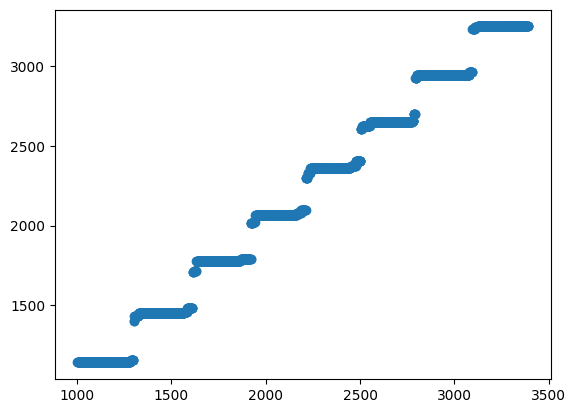

In [77]:
plt.scatter(y_train,y_train_pred)